# Understanding Impact on Economic Activity

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
eth_adm0 = gpd.read_file('../../data/boundaries/eth_admbnda_adm0_csa_bofedb_itos_2021.shp')
eth_adm1 = gpd.read_file('../../data/boundaries/eth_admbnda_adm1_csa_bofedb_2021.shp')
eth_adm2 = gpd.read_file('../../data/boundaries/eth_admbnda_adm2_csa_bofedb_2021.shp')
eth_adm3 = gpd.read_file('../../data/boundaries/eth_admbnda_adm3_csa_bofedb_2021.shp')

In [3]:
eth_adm0_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level0.shp')
eth_adm1_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level1.shp')
eth_adm2_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level2.shp')
#eth_adm3_gadm = gpd.read_file('../../data/boundaries/gadm/ETH_GADM_level3.shp')

In [129]:
evi_adm0_annual = pd.read_csv('../../data/agriculture/processed/eth_evi_yearly_summary_adm0.csv')
evi_adm1_annual = pd.read_csv('../../data/agriculture/processed/eth_evi_yearly_summary_adm1.csv')
evi_adm0_monthly = pd.read_csv('../../data/agriculture/processed/eth_evi_monthly_summary_adm0.csv')
evi_adm1_monthly = pd.read_csv('../../data/agriculture/processed/eth_evi_monthly_summary_adm1.csv')

evi_adm2_annual = pd.read_csv('../../data/agriculture/processed/eth_evi_yearly_summary_adm2.csv')
evi_adm2_monthly = pd.read_csv('../../data/agriculture/processed/eth_evi_monthly_summary_adm2.csv')
evi_adm2_monthly_zscore = pd.read_csv('../../data/agriculture/processed/eth_zscore_adm2_2019_2024.csv')

In [130]:
evi_adm0_annual['date'] = pd.to_datetime(evi_adm0_annual['date'])
evi_adm0_annual.rename(columns={'mean': 'evi_median'}, inplace=True)

In [131]:
airpollution_adm1 = pd.read_csv('../../data/air_pollution/processed/air_pollution_monthly_adm1_2019_2024.csv')
airpollution_adm2 = pd.read_csv('../../data/air_pollution/processed/air_pollution_monthly_adm2_2019_2024.csv')
airpollution_adm3 = pd.read_csv('../../data/air_pollution/processed/eth_adm3_no2_monthly_2019_2024.csv')

C:\Users\wb588851\AppData\Local\Temp\ipykernel_26556\4010708093.py:3: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  airpollution_adm3 = pd.read_csv('../../data/air_pollution/processed/eth_adm3_no2_monthly_2019_2024.csv')


In [15]:
airpollution_adm0 = airpollution_adm1.groupby(['ADM0_EN', 'event_date'])['NO2'].mean().reset_index()

In [16]:
airpollution_adm0.rename(columns={'event_date': 'date'}, inplace=True)
airpollution_adm1.rename(columns={'event_date': 'date'}, inplace=True)
airpollution_adm2.rename(columns={'event_date': 'date'}, inplace=True)
airpollution_adm3.rename(columns={'start_date': 'date'}, inplace=True)

In [18]:
airpollution_adm0['date'] = pd.to_datetime(airpollution_adm0['date'])

In [19]:
airpollution_adm0_annual = airpollution_adm0.groupby(['ADM0_EN', pd.Grouper(key='date', freq='YS')])['NO2'].mean().reset_index()

In [22]:
from acled_conflict_analysis import processing

conflict = pd.read_csv('../../data/conflict/acled_raw_20250612.csv')
conflict.rename(columns={'nrFatalities': 'fatalities'}, inplace=True)
processing.data_type_conversion(conflict)

In [ ]:
conflict_adm0_monthly = processing.get_acled_by_admin(eth_adm0, conflict, ['ADM0_EN'], freq='MS')
conflict_adm1_monthly = processing.get_acled_by_admin(eth_adm1, conflict, ['ADM1_EN'], freq='MS')
conflict_adm2_monthly = processing.get_acled_by_admin(eth_adm2, conflict, ['ADM1_EN', 'ADM2_EN'], freq='MS')
conflict_adm3_monthly = processing.get_acled_by_admin(eth_adm3, conflict, ['ADM1_EN', 'ADM2_EN', 'ADM3_EN'], freq='MS')

In [35]:
import numpy as np
def get_conflict_index(df):
    df['conflict_index'] = np.sqrt((df['nrEvents']) * (df['nrFatalities'] + 1))

    return df

In [24]:
conflict_adm0_annual = processing.get_acled_by_admin(eth_adm0, conflict, ['ADM0_EN'], freq='YS')
conflict_adm0_annual = processing.get_acled_by_admin(eth_adm0, conflict, ['ADM0_EN'], freq='YS')
conflict_adm1_annual = processing.get_acled_by_admin(eth_adm1, conflict, ['ADM1_EN'], freq='YS')
conflict_adm2_annual = processing.get_acled_by_admin(eth_adm2, conflict, ['ADM1_EN', 'ADM2_EN'], freq='YS')
conflict_adm3_annual = processing.get_acled_by_admin(eth_adm3, conflict, ['ADM1_EN', 'ADM2_EN', 'ADM3_EN'], freq='YS')

In [25]:
conflict_adm0_annual.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm1_annual.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm2_annual.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm3_annual.rename(columns={'event_date': 'date'}, inplace=True)

In [26]:
conflict_adm0_monthly.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm1_monthly.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm2_monthly.rename(columns={'event_date': 'date'}, inplace=True)
conflict_adm3_monthly.rename(columns={'event_date': 'date'}, inplace=True)

In [36]:
conflict_adm0_monthly = get_conflict_index(conflict_adm0_monthly)
conflict_adm0_annual = get_conflict_index(conflict_adm0_annual)

In [37]:
ntl_adm0_monthly = pd.read_csv('../../data/nighttime-lights/processed/ntl_adm0_monthly_2012_2024.csv')
ntl_adm1_monthly = pd.read_csv('../../data/nighttime-lights/processed/ntl_adm1_monthly_2012_2024.csv')
ntl_adm2_monthly = pd.read_csv('../../data/nighttime-lights/processed/ntl_adm2_monthly_2012_2024.csv')

In [38]:
ntl_adm0_monthly['date'] = pd.to_datetime(ntl_adm0_monthly['date'])
ntl_adm0_annual = ntl_adm0_monthly.groupby(['COUNTRY', pd.Grouper(key='date', freq='YS')])[['ntl_sum']].sum().reset_index()

In [42]:
evi_adm0_annual.rename(columns={'admin_area': 'ADM0_EN'}, inplace=True)
ntl_adm0_annual.rename(columns={'COUNTRY': 'ADM0_EN'}, inplace=True)

In [43]:
merged = pd.merge(airpollution_adm0_annual, conflict_adm0_annual, on=['date', 'ADM0_EN'], how='left')
merged.drop(columns=['index'], inplace=True)

merged = pd.merge(merged, ntl_adm0_annual[['ADM0_EN', 'date', 'ntl_sum']], on=['date', 'ADM0_EN'], how='left')
merged = pd.merge(merged, evi_adm0_annual, on=['date', 'ADM0_EN'], how='left')

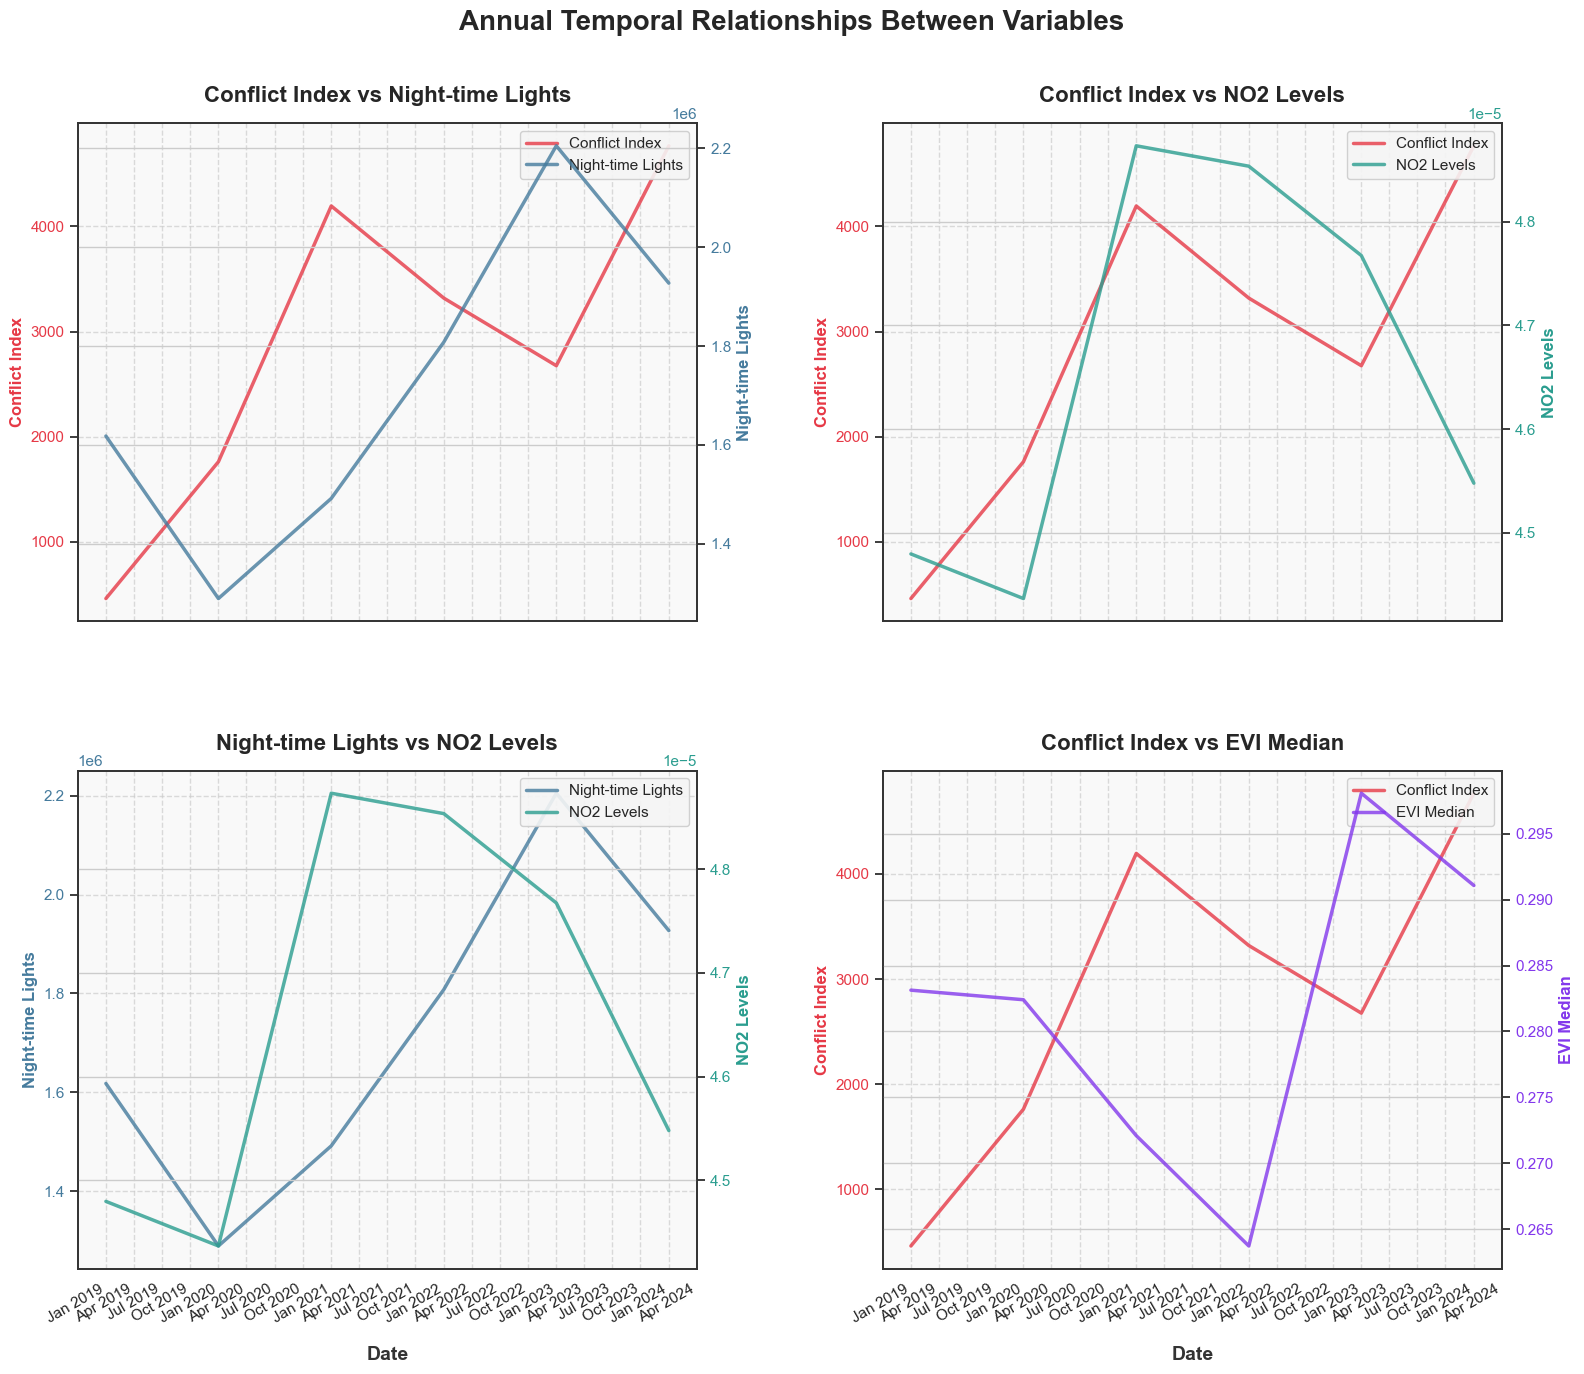

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Set the style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.labelcolor'] = '#333333'
plt.rcParams['figure.facecolor'] = 'white'

# Load data
df = merged.copy()

# Set up a color palette
colors = {'conflict': '#E63946', 'ntl': '#457B9D', 'no2': '#2A9D8F', 'evi': '#8338EC'}

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Function to format axis
def format_axis(ax, title, color1, color2):
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add a subtle background color to highlight the plot area
    ax.set_facecolor('#f9f9f9')
    
    # Format date axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Plot 1: Conflict vs NTL
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax1, label='Conflict Index', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='ntl_sum', data=df, color=colors['ntl'], 
             ax=ax1_twin, label='Night-time Lights', linewidth=2.5, alpha=0.8)

format_axis(ax1, 'Conflict Index vs Night-time Lights', colors['conflict'], colors['ntl'])
ax1.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax1_twin.set_ylabel('Night-time Lights', fontsize=12, color=colors['ntl'], fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor=colors['ntl'])
ax1.tick_params(axis='y', labelcolor=colors['conflict'])

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax1.get_legend().get_frame().set_edgecolor('#cccccc')
ax1_twin.get_legend().remove()

# Plot 2: Conflict vs NO2
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax2, label='Conflict Index', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='NO2', data=df, color=colors['no2'], 
             ax=ax2_twin, label='NO2 Levels', linewidth=2.5, alpha=0.8)

format_axis(ax2, 'Conflict Index vs NO2 Levels', colors['conflict'], colors['no2'])
ax2.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax2_twin.set_ylabel('NO2 Levels', fontsize=12, color=colors['no2'], fontweight='bold')
ax2_twin.tick_params(axis='y', labelcolor=colors['no2'])
ax2.tick_params(axis='y', labelcolor=colors['conflict'])

# Create a combined legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax2.get_legend().get_frame().set_edgecolor('#cccccc')
ax2_twin.get_legend().remove()

# Plot 3: NTL vs NO2
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
sns.lineplot(x='date', y='ntl_sum', data=df, color=colors['ntl'], 
             ax=ax3, label='Night-time Lights', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='NO2', data=df, color=colors['no2'], 
             ax=ax3_twin, label='NO2 Levels', linewidth=2.5, alpha=0.8)

format_axis(ax3, 'Night-time Lights vs NO2 Levels', colors['ntl'], colors['no2'])
ax3.set_ylabel('Night-time Lights', fontsize=12, color=colors['ntl'], fontweight='bold')
ax3_twin.set_ylabel('NO2 Levels', fontsize=12, color=colors['no2'], fontweight='bold')
ax3_twin.tick_params(axis='y', labelcolor=colors['no2'])
ax3.tick_params(axis='y', labelcolor=colors['ntl'])

# Create a combined legend
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax3.get_legend().get_frame().set_edgecolor('#cccccc')
ax3_twin.get_legend().remove()

# Plot 4: Conflict vs EVI Median (new plot)
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax4, label='Conflict Index', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='evi_median', data=df, color=colors['evi'], 
             ax=ax4_twin, label='EVI Median', linewidth=2.5, alpha=0.8)

format_axis(ax4, 'Conflict Index vs EVI Median', colors['conflict'], colors['evi'])
ax4.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax4_twin.set_ylabel('EVI Median', fontsize=12, color=colors['evi'], fontweight='bold')
ax4_twin.tick_params(axis='y', labelcolor=colors['evi'])
ax4.tick_params(axis='y', labelcolor=colors['conflict'])

# Create a combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax4.get_legend().get_frame().set_edgecolor('#cccccc')
ax4_twin.get_legend().remove()

# Add a dataset title
plt.suptitle('Annual Temporal Relationships Between Variables', 
             fontsize=20, fontweight='bold', y=0.98)

# Add x-axis label to the bottom subplot only
axes[1, 0].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)
axes[1, 1].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)

# Format x-axis dates
plt.gcf().autofmt_xdate()
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Add subtle shadow to figure
plt.savefig('../../docs/images/temporal_relationships.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

**Visual inspection shows us that EVI was low, when conflict was high and the other way around.**

In [46]:
gdp = pd.read_csv('../../data/general/eth_gdp.csv')
gdp['Year'] = pd.to_datetime(gdp['Year'])
gdp.rename(columns={'Year':'date'}, inplace=True)

In [47]:
merged = merged.merge(gdp, on=['date'])

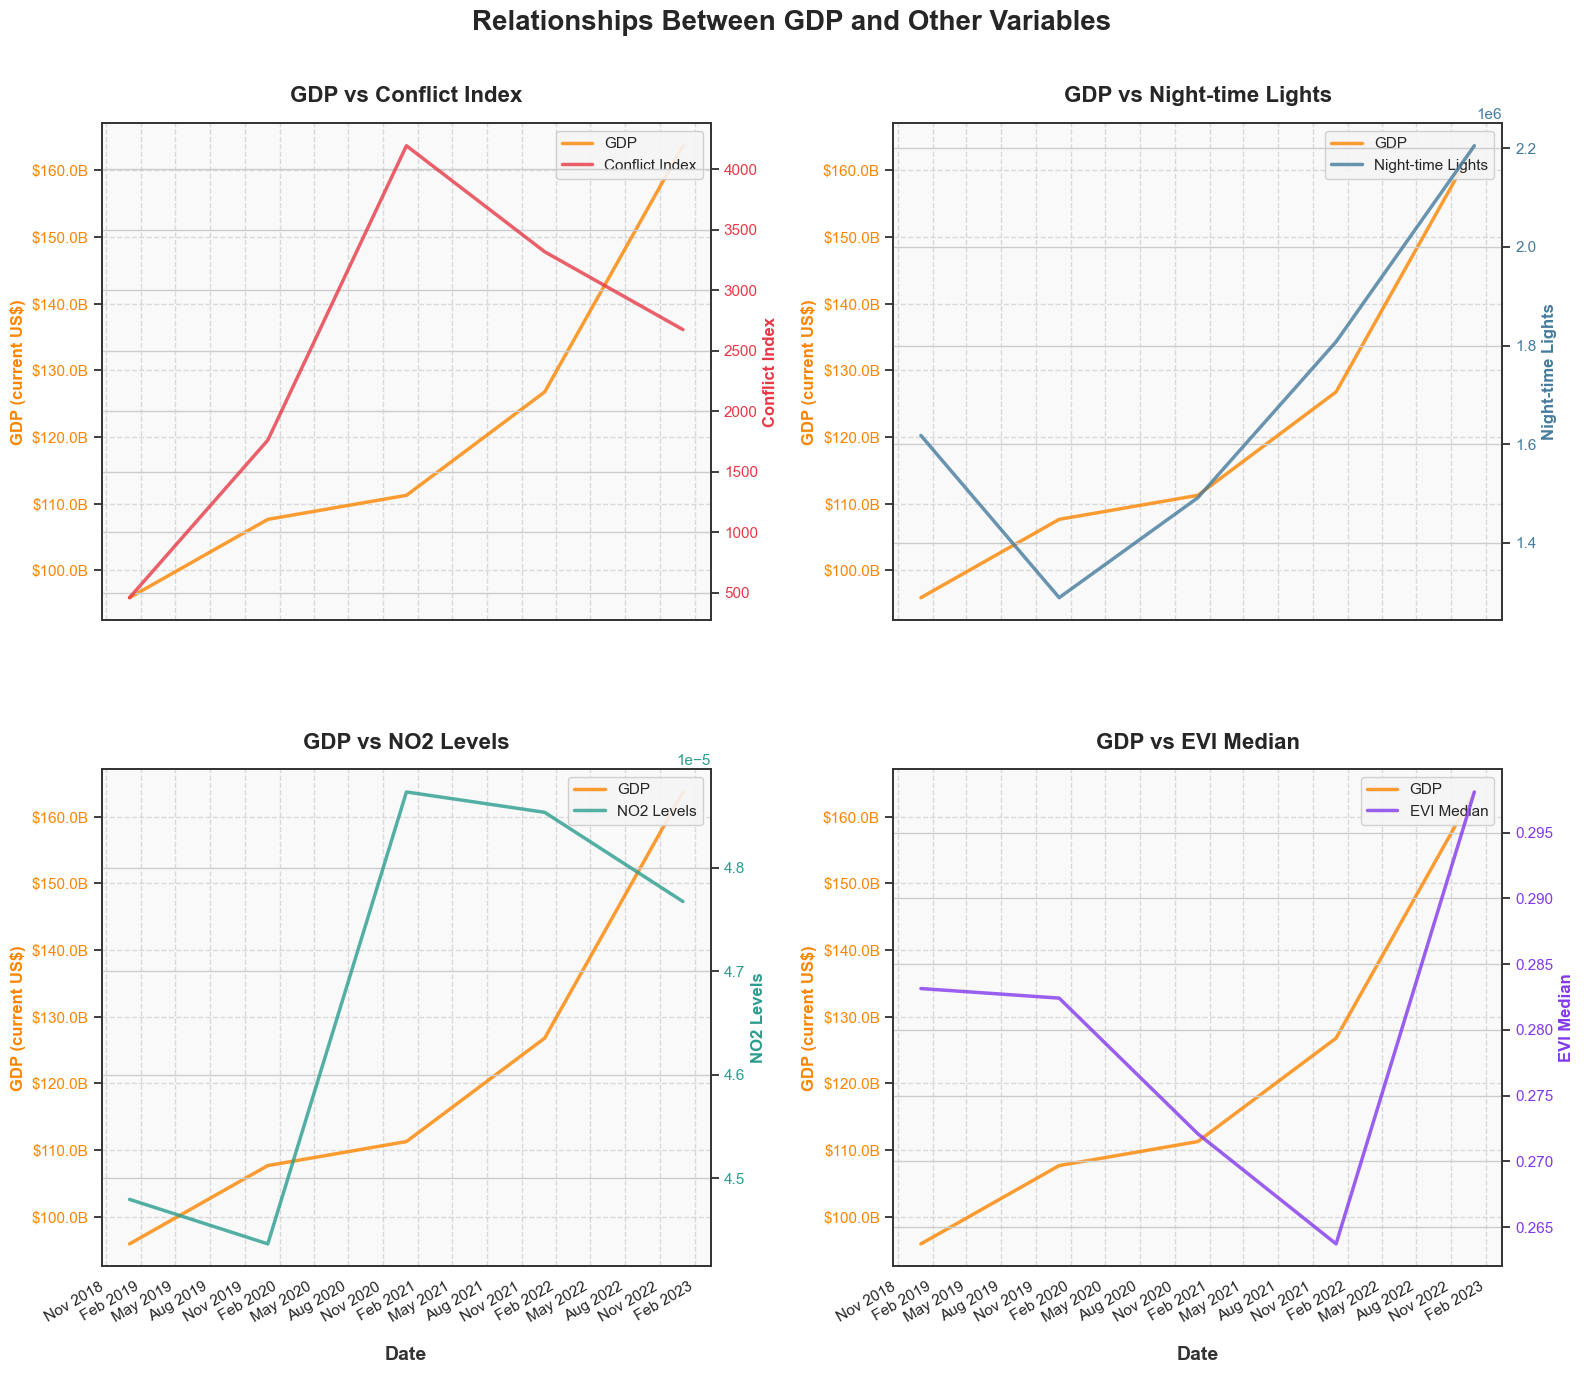

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FuncFormatter

# Set the style
sns.set(style="whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.facecolor'] = '#f5f5f5'
plt.rcParams['axes.edgecolor'] = '#333333'
plt.rcParams['axes.labelcolor'] = '#333333'
plt.rcParams['figure.facecolor'] = 'white'

# Load data
df = merged.copy()

# Set up a color palette
colors = {'conflict': '#E63946', 'ntl': '#457B9D', 'no2': '#2A9D8F', 'evi': '#8338EC', 'gdp': '#FB8500'}

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))

# Function to format axis and create GDP twin axis
def format_axis(ax, title, color1, color2):
    ax.set_title(title, fontsize=16, fontweight='bold', pad=15)
    ax.tick_params(axis='both', labelsize=11)
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add a subtle background color to highlight the plot area
    ax.set_facecolor('#f9f9f9')
    
    # Format date axis
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Function to format GDP values (in billions)
def billions_formatter(x, pos):
    return f'${x/1e9:.1f}B'

# Plot 1: GDP vs Conflict Index
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax1, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='conflict_index', data=df, color=colors['conflict'], 
             ax=ax1_twin, label='Conflict Index', linewidth=2.5, alpha=0.8)

format_axis(ax1, 'GDP vs Conflict Index', colors['gdp'], colors['conflict'])
ax1.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax1_twin.set_ylabel('Conflict Index', fontsize=12, color=colors['conflict'], fontweight='bold')
ax1_twin.tick_params(axis='y', labelcolor=colors['conflict'])
ax1.tick_params(axis='y', labelcolor=colors['gdp'])
ax1.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax1.get_legend().get_frame().set_edgecolor('#cccccc')
ax1_twin.get_legend().remove()

# Plot 2: GDP vs NTL
ax2 = axes[0, 1]
ax2_twin = ax2.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax2, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='ntl_sum', data=df, color=colors['ntl'], 
             ax=ax2_twin, label='Night-time Lights', linewidth=2.5, alpha=0.8)

format_axis(ax2, 'GDP vs Night-time Lights', colors['gdp'], colors['ntl'])
ax2.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax2_twin.set_ylabel('Night-time Lights', fontsize=12, color=colors['ntl'], fontweight='bold')
ax2_twin.tick_params(axis='y', labelcolor=colors['ntl'])
ax2.tick_params(axis='y', labelcolor=colors['gdp'])
ax2.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax2.get_legend().get_frame().set_edgecolor('#cccccc')
ax2_twin.get_legend().remove()

# Plot 3: GDP vs NO2
ax3 = axes[1, 0]
ax3_twin = ax3.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax3, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='NO2', data=df, color=colors['no2'], 
             ax=ax3_twin, label='NO2 Levels', linewidth=2.5, alpha=0.8)

format_axis(ax3, 'GDP vs NO2 Levels', colors['gdp'], colors['no2'])
ax3.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax3_twin.set_ylabel('NO2 Levels', fontsize=12, color=colors['no2'], fontweight='bold')
ax3_twin.tick_params(axis='y', labelcolor=colors['no2'])
ax3.tick_params(axis='y', labelcolor=colors['gdp'])
ax3.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax3_twin.get_legend_handles_labels()
ax3.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax3.get_legend().get_frame().set_edgecolor('#cccccc')
ax3_twin.get_legend().remove()

# Plot 4: GDP vs EVI Median
ax4 = axes[1, 1]
ax4_twin = ax4.twinx()
sns.lineplot(x='date', y='GDP (current US$)', data=df, color=colors['gdp'], 
             ax=ax4, label='GDP', linewidth=2.5, alpha=0.8)
sns.lineplot(x='date', y='evi_median', data=df, color=colors['evi'], 
             ax=ax4_twin, label='EVI Median', linewidth=2.5, alpha=0.8)

format_axis(ax4, 'GDP vs EVI Median', colors['gdp'], colors['evi'])
ax4.set_ylabel('GDP (current US$)', fontsize=12, color=colors['gdp'], fontweight='bold')
ax4_twin.set_ylabel('EVI Median', fontsize=12, color=colors['evi'], fontweight='bold')
ax4_twin.tick_params(axis='y', labelcolor=colors['evi'])
ax4.tick_params(axis='y', labelcolor=colors['gdp'])
ax4.yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Create a combined legend
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax4_twin.get_legend_handles_labels()
ax4.legend(lines1 + lines2, labels1 + labels2, loc='upper right', 
           frameon=True, framealpha=0.9, fontsize=11)
ax4.get_legend().get_frame().set_edgecolor('#cccccc')
ax4_twin.get_legend().remove()

# Add a dataset title
plt.suptitle('Relationships Between GDP and Other Variables', 
             fontsize=20, fontweight='bold', y=0.98)

# Add x-axis label to the bottom subplot only
axes[1, 0].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)
axes[1, 1].set_xlabel('Date', fontsize=14, fontweight='bold', labelpad=15)

# Format x-axis dates
plt.gcf().autofmt_xdate()
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Add subtle shadow to figure
plt.savefig('../../docs/images/gdp_relationships.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')
plt.show()

**Pearson Correlation to check for linear correlations between variables**

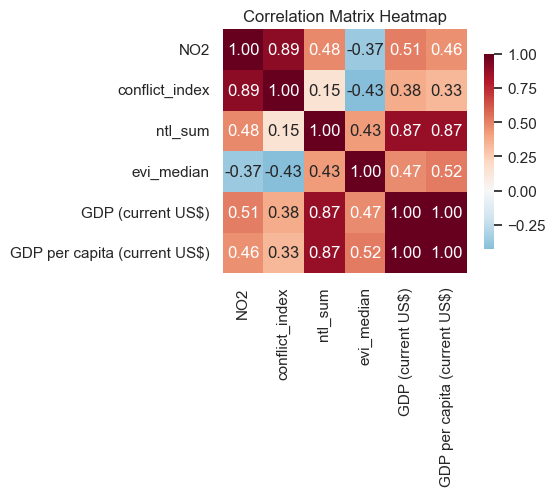

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = merged
# Numeric columns for correlation
numeric_cols = ['NO2', 'conflict_index', 
                'ntl_sum', 'evi_median',
                'GDP (current US$)', 'GDP per capita (current US$)']

# Calculate correlation matrix
corr_matrix = df[numeric_cols].corr()

# # Display correlation matrix
# print("Correlation Matrix:")
# print(corr_matrix.round(3))

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()

While Nightlights shows a clear correlation with GDP, the rest of the variables have weaker correlations. 

In [67]:
conflict_adm1_monthly.rename(columns={'event_date':'date'}, inplace=True)
evi_adm1_monthly.rename(columns={'mean':'evi_median'}, inplace=True)

airpollution_adm1['date'] = pd.to_datetime(airpollution_adm1['date'])
#ntl_adm1_monthly_hdx['date'] = pd.to_datetime(ntl_adm1_monthly_hdx['date'])
evi_adm1_monthly.rename(columns={'admin_area':'ADM1_EN'}, inplace=True)
evi_adm1_monthly['date'] = pd.to_datetime(evi_adm1_monthly['date'])
conflict_adm1_monthly = get_conflict_index(conflict_adm1_monthly)

In [136]:
airpollution_adm2.drop(columns=['Unnamed: 0'], inplace=True)
airpollution_adm2.rename(columns={'event_date':'date'}, inplace=True)

In [137]:
conflict_adm2_monthly.rename(columns={'event_date':'date'}, inplace=True)

airpollution_adm2['date'] = pd.to_datetime(airpollution_adm2['date'])
#ntl_adm2_monthly_hdx['date'] = pd.to_datetime(ntl_adm2_monthly_hdx['date'])
# evi_adm1_monthly.rename(columns={'admin_area':'ADM1_EN'}, inplace=True)
evi_adm2_monthly['date'] = pd.to_datetime(evi_adm2_monthly['date'])
conflict_adm2_monthly = get_conflict_index(conflict_adm2_monthly)

In [138]:
evi_adm2_monthly_zscore

,ADM2_EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,year,mean,count,std,median
0,Afder,Somali,ET05,Ethiopia,ET,2019,0.037708,355,0.443290,-0.039626
1,Agnewak,Gambela,ET12,Ethiopia,ET,2019,0.218448,34172,0.363655,0.172572
2,Alle,SNNP,ET07,Ethiopia,ET,2019,0.148683,7076,0.300359,0.136616
3,Amaro,SNNP,ET07,Ethiopia,ET,2019,0.172838,13270,0.332318,0.153456
4,Arsi,Oromia,ET04,Ethiopia,ET,2019,0.066300,218738,0.260536,0.040978
...,...,...,...,...,...,...,...,...,...,...
547,West Shewa,Oromia,ET04,Ethiopia,ET,2024,-0.080329,190212,0.319537,-0.075186
548,West Wellega,Oromia,ET04,Ethiopia,ET,2024,-0.126636,131737,0.302083,-0.120881
549,Western,Tigray,ET01,Ethiopia,ET,2024,0.402095,133499,0.357753,0.398604
550,Wolayita,SNNP,ET07,Ethiopia,ET,2024,0.466292,51863,0.418309,0.447512


In [69]:
merged_adm1 = pd.merge(airpollution_adm1, conflict_adm1_monthly, on=['date', 'ADM1_EN'], how='left')
merged_adm1.drop(columns=['index'], inplace=True)

#merged_adm1 = pd.merge(merged_adm1, ntl_adm1_monthly_hdx[['date', 'ntl_sum', 'ADM1_EN']], on=['date', 'ADM1_EN'], how='left')
merged_adm1 = pd.merge(merged_adm1, evi_adm1_monthly, on=['date', 'ADM1_EN'], how='left')
merged_adm1.drop(columns={'Unnamed: 0'}, inplace=True)

In [132]:
merged_adm2 = pd.merge(airpollution_adm2, conflict_adm2_monthly, on=['date', 'ADM1_EN', 'ADM2_EN'], how='left')
merged_adm2.drop(columns=['index'], inplace=True)

#merged_adm2 = pd.merge(merged_adm2, ntl_adm2_monthly_hdx[['date', 'ntl_sum', 'ADM2_EN']], on=['date', 'ADM2_EN'], how='left')
merged_adm2 = pd.merge(merged_adm2, evi_adm2_monthly, on=['date', 'ADM1_EN', 'ADM2_EN'], how='left')
merged_adm2.drop(columns={'Unnamed: 0'}, inplace=True)

KeyError: 'date'

## Did conflict impact EVI? 

In [ ]:
evi_zscore = pd.read_csv('../../data/agriculture/processed/eth_zscore_adm2_2019_2024.csv')


In [127]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

class EVIConflictModel:
    """
    EVI-Conflict Diff-in-Diff Model customized for your data structure:
    
    Conflict data: index, date, ADM1_EN, ADM2_EN, nrFatalities, nrEvents, conflict_index
    EVI data: ADM2_EN, ADM1_EN, ADM1_PCODE, ADM0_EN, ADM0_PCODE, year, mean, count, std, median
    
    Growing season: months 6-11
    """
    
    def __init__(self, conflict_df, evi_df):
        """
        Initialize with your specific data structure
        """
        self.conflict_df = conflict_df.copy()
        self.evi_df = evi_df.copy()
        self.merged_df = None
        
        # Prepare conflict data
        self.conflict_df['date'] = pd.to_datetime(self.conflict_df['date'])
        self.conflict_df['year'] = self.conflict_df['date'].dt.year
        self.conflict_df['month'] = self.conflict_df['date'].dt.month
        
        # Use EVI mean as our z-score (assuming it's already calculated)
        self.evi_df = self.evi_df.rename(columns={'mean': 'evi_zscore'})
        
        # print(f"Conflict data shape: {self.conflict_df.shape}")
        # print(f"EVI data shape: {self.evi_df.shape}")
        # print(f"Conflict date range: {self.conflict_df['date'].min()} to {self.conflict_df['date'].max()}")
        # print(f"EVI year range: {self.evi_df['year'].min()} to {self.evi_df['year'].max()}")
    
    def aggregate_seasonal_conflict(self):
        """
        Aggregate conflict by growing season and other periods
        Growing season: months 6-11
        """
        
        # Define seasons
        self.conflict_df['season'] = 'other'
        self.conflict_df.loc[self.conflict_df['month'].isin([6,7,8,9]), 'season'] = 'growing'
        self.conflict_df.loc[self.conflict_df['month'].isin([12,1,2,3,4]), 'season'] = 'pre_growing'
        self.conflict_df.loc[self.conflict_df['month'].isin([4,5]), 'season'] = 'planting'
        
        # Aggregate by ADM2_EN-year-season using multiple conflict measures
        seasonal_agg = self.conflict_df.groupby(['ADM2_EN', 'year', 'season']).agg({
            'nrFatalities': ['sum', 'mean', 'max'],
            'nrEvents': ['sum', 'mean', 'max'], 
            'conflict_index': ['sum', 'mean', 'max', 'count']
        }).reset_index()
        
        # Flatten column names
        seasonal_agg.columns = ['ADM2_EN', 'year', 'season'] + [
            f'{col[0]}_{col[1]}' for col in seasonal_agg.columns[3:]
        ]
        
        # Pivot to get seasons as columns
        seasonal_pivot = seasonal_agg.pivot(
            index=['ADM2_EN', 'year'], 
            columns='season', 
            values=[col for col in seasonal_agg.columns[3:]]
        ).fillna(0)
        
        # Flatten column names: metric_season
        seasonal_pivot.columns = [f'{col[0]}_{col[1]}' for col in seasonal_pivot.columns]
        seasonal_pivot = seasonal_pivot.reset_index()
        
        return seasonal_pivot
    
    def create_lagged_variables(self, df, max_lags=3):
        """
        Create lagged conflict variables (1-3 years)
        """
        df = df.sort_values(['ADM2_EN', 'year']).reset_index(drop=True)
        
        # Key conflict variables to lag (focus on growing season)
        key_vars = [
            'nrFatalities_sum_growing', 'nrEvents_sum_growing', 'conflict_index_sum_growing',
            'nrFatalities_sum_pre_growing', 'nrEvents_sum_pre_growing'
        ]
        
        for var in key_vars:
            if var in df.columns:
                for lag in range(1, max_lags + 1):
                    # Initialize the lagged column
                    df[f'{var}_lag{lag}'] = np.nan
                    
                    # Calculate lags for each admin unit separately
                    for admin_unit in df['ADM2_EN'].unique():
                        mask = df['ADM2_EN'] == admin_unit
                        admin_data = df.loc[mask].copy().sort_values('year')
                        
                        if len(admin_data) > lag:
                            # Create lagged values
                            lagged_values = admin_data[var].shift(lag)
                            
                            # Map back to original dataframe
                            for idx, lagged_val in zip(admin_data.index, lagged_values):
                                if not pd.isna(lagged_val):
                                    df.loc[idx, f'{var}_lag{lag}'] = lagged_val
        
        return df
    
    def create_cumulative_variables(self, df, window_years=3):
        """
        Create cumulative conflict exposure variables
        """
        df = df.sort_values(['ADM2_EN', 'year']).reset_index(drop=True)
        
        # Focus on growing season variables
        growing_vars = [
            'nrFatalities_sum_growing', 'nrEvents_sum_growing', 'conflict_index_sum_growing'
        ]
        
        for var in growing_vars:
            if var in df.columns:
                # Initialize columns
                df[f'{var}_cumsum_{window_years}yr'] = 0.0
                df[f'{var}_mavg_{window_years}yr'] = 0.0
                
                # Calculate rolling statistics for each admin unit separately
                for admin_unit in df['ADM2_EN'].unique():
                    mask = df['ADM2_EN'] == admin_unit
                    admin_data = df.loc[mask, var].values
                    
                    if len(admin_data) > 0:
                        # Calculate rolling sum
                        rolling_sum = pd.Series(admin_data).rolling(
                            window=window_years, min_periods=1
                        ).sum().values
                        
                        # Calculate rolling mean
                        rolling_mean = pd.Series(admin_data).rolling(
                            window=window_years, min_periods=1
                        ).mean().values
                        
                        # Assign back to dataframe
                        df.loc[mask, f'{var}_cumsum_{window_years}yr'] = rolling_sum
                        df.loc[mask, f'{var}_mavg_{window_years}yr'] = rolling_mean
        
        return df
    
    def create_treatment_variables(self, df):
        """
        Create binary and continuous treatment variables
        """
        
        # Multiple treatment definitions
        
        # 1. Fatalities-based treatment (high fatality areas)
        if 'nrFatalities_sum_growing' in df.columns:
            fatality_threshold = df['nrFatalities_sum_growing'].quantile(0.60)
            df['high_fatality_growing'] = (df['nrFatalities_sum_growing'] > fatality_threshold).astype(int)
        
        # 2. Events-based treatment (high conflict frequency)
        if 'nrEvents_sum_growing' in df.columns:
            events_threshold = df['nrEvents_sum_growing'].quantile(0.60)
            df['high_events_growing'] = (df['nrEvents_sum_growing'] > events_threshold).astype(int)
        
        # 3. Conflict index treatment
        if 'conflict_index_sum_growing' in df.columns:
            index_threshold = df['conflict_index_sum_growing'].quantile(0.60)
            df['high_conflict_growing'] = (df['conflict_index_sum_growing'] > index_threshold).astype(int)
            
            # Ever treated variables
            ever_treated_vars = ['high_fatality_growing', 'high_events_growing', 'high_conflict_growing']
            
            for var in ever_treated_vars:
                if var in df.columns:
                    ever_var = f"ever_{var.replace('high_', '')}"
                    ever_treated = df.groupby('ADM2_EN')[var].max().reset_index()
                    ever_treated.columns = ['ADM2_EN', ever_var]
                    df = df.merge(ever_treated, on='ADM2_EN')
        
        # 4. Continuous treatment variables (log-transformed)
        continuous_vars = ['nrFatalities_sum_growing', 'nrEvents_sum_growing', 'conflict_index_sum_growing']
        
        for var in continuous_vars:
            if var in df.columns:
                df[f'{var}_log'] = np.log1p(df[var])
        
        return df
    
    def prepare_full_dataset(self):
        """
        Prepare the complete dataset with all variables
        """
        
        #print("Step 1: Aggregating seasonal conflict...")
        seasonal_conflict = self.aggregate_seasonal_conflict()
      # print(f"Seasonal aggregation shape: {seasonal_conflict.shape}")
        
      # print("Step 2: Merging with EVI data...")
        merged = self.evi_df.merge(seasonal_conflict, on=['ADM2_EN', 'year'], how='left')
        merged = merged.fillna(0)  # Fill missing conflict data with 0
      # print(f"After merge shape: {merged.shape}")
        
      # print("Step 3: Creating lagged variables...")
        merged = self.create_lagged_variables(merged, max_lags=3)
        
      # print("Step 4: Creating cumulative variables...")
        merged = self.create_cumulative_variables(merged, window_years=3)
        
      # print("Step 5: Creating treatment variables...")
        merged = self.create_treatment_variables(merged)
        
      # print("Step 6: Creating time variables...")
        # Adjust threshold based on your data
        median_year = merged['year'].median()
        merged['post_median'] = (merged['year'] >= median_year).astype(int)
        
        # Alternative: use specific conflict escalation year if you know it
        # merged['post_2020'] = (merged['year'] >= 2020).astype(int)
        
        self.merged_df = merged
      # print(f"Final dataset shape: {merged.shape}")
      # print(f"Available columns: {merged.columns.tolist()}")
        
        return merged
    
    def run_diff_in_diff_models(self):
        """
        Run conflict events models with lagged effects focus
        """
        
        if self.merged_df is None:
            self.prepare_full_dataset()
        
        models = {}
        df = self.merged_df
        
        # Model 1: Contemporaneous events impact
        if 'nrEvents_sum_growing' in df.columns:
          # print("Running Model 1: Contemporaneous events impact...")
            models['events_current'] = smf.ols(
                'evi_zscore ~ nrEvents_sum_growing + C(ADM2_EN) + C(year)', 
                data=df
            ).fit(cov_type='cluster', cov_kwds={'groups': df['ADM2_EN']})
        
        # Model 2: 1-year lagged events
        if 'nrEvents_sum_growing_lag1' in df.columns:
          # print("Running Model 2: 1-year lagged events...")
            df_lag1 = df.dropna(subset=['nrEvents_sum_growing_lag1'])
            models['events_lag1'] = smf.ols(
                'evi_zscore ~ nrEvents_sum_growing_lag1 + C(ADM2_EN) + C(year)', 
                data=df_lag1
            ).fit(cov_type='cluster', cov_kwds={'groups': df_lag1['ADM2_EN']})
        
        # Model 3: 2-year lagged events  
        if 'nrEvents_sum_growing_lag2' in df.columns:
          # print("Running Model 3: 2-year lagged events...")
            df_lag2 = df.dropna(subset=['nrEvents_sum_growing_lag2'])
            models['events_lag2'] = smf.ols(
                'evi_zscore ~ nrEvents_sum_growing_lag2 + C(ADM2_EN) + C(year)', 
                data=df_lag2
            ).fit(cov_type='cluster', cov_kwds={'groups': df_lag2['ADM2_EN']})
        
        # Model 4: 3-year lagged events
        if 'nrEvents_sum_growing_lag3' in df.columns:
          # print("Running Model 4: 3-year lagged events...")
            df_lag3 = df.dropna(subset=['nrEvents_sum_growing_lag3'])
            models['events_lag3'] = smf.ols(
                'evi_zscore ~ nrEvents_sum_growing_lag3 + C(ADM2_EN) + C(year)', 
                data=df_lag3
            ).fit(cov_type='cluster', cov_kwds={'groups': df_lag3['ADM2_EN']})
        
        # Model 5: Distributed lag (current + lag1 + lag2)
        lag_vars = ['nrEvents_sum_growing', 'nrEvents_sum_growing_lag1', 'nrEvents_sum_growing_lag2']
        available_lags = [var for var in lag_vars if var in df.columns]
        
        if len(available_lags) >= 2:
          # print("Running Model 5: Distributed lag model...")
            df_distributed = df.dropna(subset=available_lags)
            distributed_formula = f"evi_zscore ~ {' + '.join(available_lags)} + C(ADM2_EN) + C(year)"
            models['events_distributed'] = smf.ols(
                distributed_formula, 
                data=df_distributed
            ).fit(cov_type='cluster', cov_kwds={'groups': df_distributed['ADM2_EN']})
        
        # Model 6: Cumulative events (3-year window)
        if 'nrEvents_sum_growing_cumsum_3yr' in df.columns:
          # print("Running Model 6: Cumulative events (3-year)...")
            models['events_cumulative'] = smf.ols(
                'evi_zscore ~ nrEvents_sum_growing_cumsum_3yr + C(ADM2_EN) + C(year)', 
                data=df
            ).fit(cov_type='cluster', cov_kwds={'groups': df['ADM2_EN']})
        
        # Model 7: Treatment effects (high events areas)
        if 'ever_events_growing' in df.columns:
          # print("Running Model 7: Treatment effects (high events)...")
            models['events_treatment'] = smf.ols(
                'evi_zscore ~ ever_events_growing * post_median + C(ADM2_EN) + C(year)', 
                data=df
            ).fit(cov_type='cluster', cov_kwds={'groups': df['ADM2_EN']})
        
        self.models = models
        return models
    
    def summarize_results(self):
        """
        Summarize model results with interpretation
        """
        
      # print("\n" + "="*80)
      # print("EVI-CONFLICT DIFF-IN-DIFF MODEL RESULTS")
      # print("="*80)
        
        for name, model in self.models.items():
          # print(f"\n{name.upper()} MODEL:")
          # print("-" * 50)
            
            # Key coefficients (exclude fixed effects)
            key_vars = [var for var in model.params.index 
                       if not var.startswith('C(') and var != 'Intercept']
            
            for var in key_vars[:5]:  # Show top 5 variables
                coef = model.params[var]
                pval = model.pvalues[var]
                se = model.bse[var]
                stars = '***' if pval < 0.01 else '**' if pval < 0.05 else '*' if pval < 0.1 else ''
              # print(f"{var}: {coef:.4f}{stars} (SE: {se:.4f}, p: {pval:.3f})")
            
          # print(f"R-squared: {model.rsquared:.3f}")
          # print(f"Adjusted R-squared: {model.rsquared_adj:.3f}")
          # print(f"N: {int(model.nobs)}")
            
            # Interpretation
            if 'fatalities' in name.lower() or 'events' in name.lower():
                main_coef = [v for v in key_vars if 'sum_growing' in v]
                if main_coef:
                    coef_val = model.params[main_coef[0]]
                    effect = "negative" if coef_val < 0 else "positive"
                  # print(f"→ {effect.upper()} effect: Each additional conflict unit reduces EVI by {abs(coef_val):.4f} z-score units")
    
    def plot_diagnostics(self):
        """
        Create focused plots: high vs low conflict trends and lagged effects
        """
        
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        df = self.merged_df
        
        # Plot 1: EVI trends by conflict exposure (high vs low conflict areas)
        if 'ever_events_growing' in df.columns:
            df_plot = df.groupby(['year', 'ever_events_growing'])['evi_zscore'].mean().reset_index()
            
            for treated in [0, 1]:
                data = df_plot[df_plot['ever_events_growing'] == treated]
                label = 'High Conflict Areas' if treated else 'Low Conflict Areas'
                color = 'red' if treated else 'blue'
                axes[0].plot(data['year'], data['evi_zscore'], marker='o', label=label, 
                           color=color, linewidth=2, markersize=6)
            
            axes[0].set_title('EVI Z-scores Over Time: High vs Low Conflict Areas', fontsize=14, fontweight='bold')
            axes[0].set_xlabel('Year', fontsize=12)
            axes[0].set_ylabel('Mean EVI Z-score', fontsize=12)
            axes[0].legend(fontsize=11)
            axes[0].grid(True, alpha=0.3)
            axes[0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        
        # Plot 2: Lagged effects coefficients
        if hasattr(self, 'models') and self.models:
            lag_models = {k: v for k, v in self.models.items() if 'lag' in k or 'events_' in k}
            
            if lag_models:
                lag_names = []
                coefficients = []
                conf_intervals = []
                
                for model_name, model in lag_models.items():
                    # Find the main events coefficient
                    event_vars = [var for var in model.params.index if 'nrEvents' in var and 'C(' not in var]
                    
                    if event_vars:
                        var = event_vars[0]
                        coef = model.params[var]
                        se = model.bse[var]
                        
                        # Clean up model name for display
                        if 'current' in model_name:
                            display_name = 'Current Year'
                        elif 'lag1' in model_name:
                            display_name = '1-Year Lag'
                        elif 'lag2' in model_name:
                            display_name = '2-Year Lag' 
                        elif 'lag3' in model_name:
                            display_name = '3-Year Lag'
                        elif 'cumulative' in model_name:
                            display_name = 'Cumulative (3yr)'
                        else:
                            display_name = model_name.replace('events_', '').title()
                        
                        lag_names.append(display_name)
                        coefficients.append(coef)
                        conf_intervals.append(1.96 * se)  # 95% CI
                
                if coefficients:
                    x_pos = range(len(lag_names))
                    
                    # Plot coefficients with confidence intervals
                    axes[1].bar(x_pos, coefficients, yerr=conf_intervals, capsize=5, 
                              color=['darkred' if c < 0 else 'darkblue' for c in coefficients],
                              alpha=0.7, edgecolor='black')
                    
                    axes[1].set_title('Conflict Events Effects on EVI by Lag Period', fontsize=14, fontweight='bold')
                    axes[1].set_xlabel('Lag Period', fontsize=12)
                    axes[1].set_ylabel('Coefficient (Effect on EVI Z-score)', fontsize=12)
                    axes[1].set_xticks(x_pos)
                    axes[1].set_xticklabels(lag_names, rotation=45, ha='right')
                    axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.8)
                    axes[1].grid(True, alpha=0.3, axis='y')
                    
                    # Add significance stars
                    for i, (coef, se) in enumerate(zip(coefficients, [ci/1.96 for ci in conf_intervals])):
                        p_val = 2 * (1 - stats.norm.cdf(abs(coef/se)))
                        stars = '***' if p_val < 0.01 else '**' if p_val < 0.05 else '*' if p_val < 0.1 else ''
                        if stars:
                            y_pos = coef + conf_intervals[i]/1.96 + 0.001
                            axes[1].text(i, y_pos, stars, ha='center', fontsize=12, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        if 'ever_events_growing' in df.columns:
          # print("\n" + "="*60)
          # print("HIGH VS LOW CONFLICT SUMMARY STATISTICS")
          # print("="*60)
            
            summary_stats = df.groupby('ever_events_growing').agg({
                'evi_zscore': ['mean', 'std', 'count'],
                'nrEvents_sum_growing': ['mean', 'std', 'max']
            }).round(4)
            
          # print("\nEVI Z-Score Statistics:")
          # print(summary_stats['evi_zscore'])
          # print("\nConflict Events Statistics:")
          # print(summary_stats['nrEvents_sum_growing'])
            
            # Simple difference test
            high_conflict = df[df['ever_events_growing'] == 1]['evi_zscore']
            low_conflict = df[df['ever_events_growing'] == 0]['evi_zscore']
            
            if len(high_conflict) > 0 and len(low_conflict) > 0:
                from scipy import stats as scipy_stats
                t_stat, p_val = scipy_stats.ttest_ind(high_conflict, low_conflict)
              # print(f"\nT-test for difference in means:")
              # print(f"Mean difference: {high_conflict.mean() - low_conflict.mean():.4f}")
              # print(f"T-statistic: {t_stat:.4f}")
              # print(f"P-value: {p_val:.4f}")
                significance = "***" if p_val < 0.01 else "**" if p_val < 0.05 else "*" if p_val < 0.1 else "not significant"
              # print(f"Result: {significance}")

# Usage function for your specific data
def run_evi_conflict_analysis(conflict_adm2_monthly, evi_zscore):
    """
    Run the complete analysis with your data
    
    Parameters:
    conflict_adm2_monthly: DataFrame with columns: index, date, ADM1_EN, ADM2_EN, nrFatalities, nrEvents, conflict_index
    evi_zscore: DataFrame with columns: ADM2_EN, ADM1_EN, ADM1_PCODE, ADM0_EN, ADM0_PCODE, year, mean, count, std, median
    """
    
    # print("Initializing EVI-Conflict Analysis...")
    # print(f"Conflict data: {conflict_adm2_monthly.shape[0]} rows, {len(conflict_adm2_monthly['ADM2_EN'].unique())} unique admin2 units")
    # print(f"EVI data: {evi_zscore.shape[0]} rows, {len(evi_zscore['ADM2_EN'].unique())} unique admin2 units")
    
    # Initialize model
    model = EVIConflictModel(conflict_adm2_monthly, evi_zscore)
    
    # Prepare dataset
    final_df = model.prepare_full_dataset()
    
    # # Run models
    models = model.run_diff_in_diff_models()
    
    # # Summarize results
    model.summarize_results()
    
    # Create diagnostic plots
    model.plot_diagnostics()
    
    return model, final_df

# Ready to use with your data:
# print("="*60)
# print("READY TO ANALYZE YOUR EVI-CONFLICT DATA!")
# print("="*60)
# print("\nUsage:")
# print("model, results_df = run_evi_conflict_analysis(conflict_adm2_monthly, evi_zscore)")
# print("\nThis will:")
# print("• Aggregate daily conflict to growing season (months 6-11)")
# print("• Create 1-3 year lagged effects")
# print("• Test fatalities, events, and conflict index impacts")
# print("• Generate diagnostic plots")
# print("• Provide robust clustered standard errors")

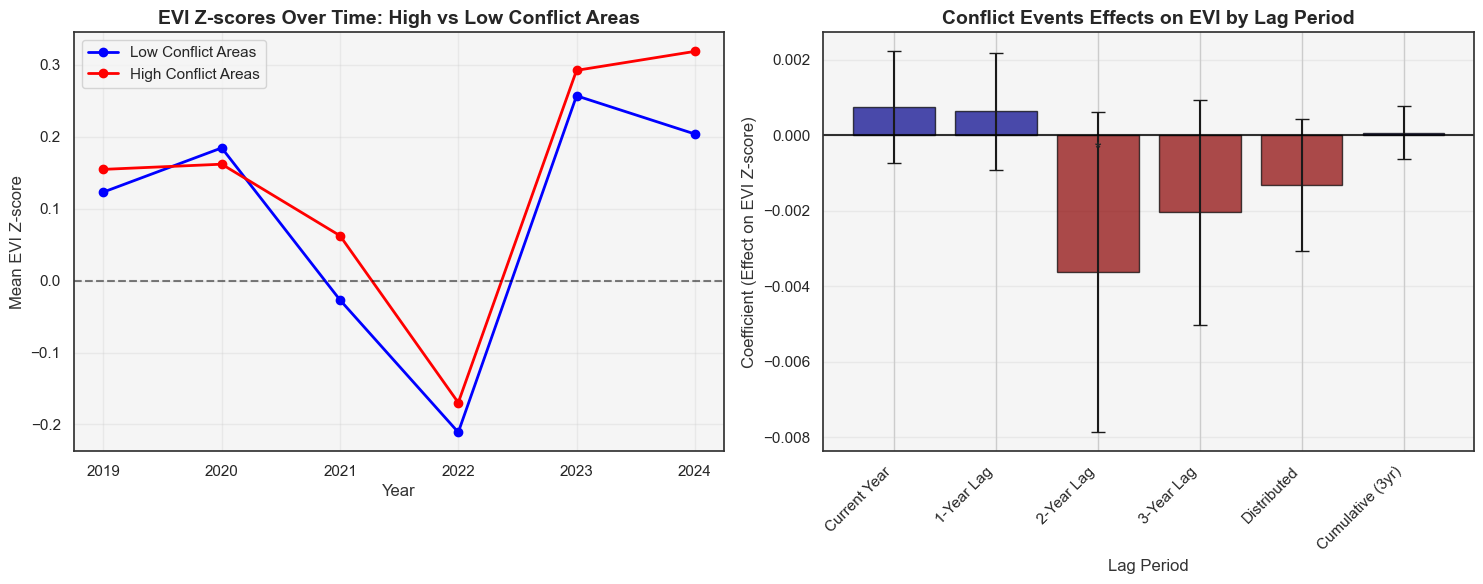

In [128]:
model, results_df = run_evi_conflict_analysis(conflict_adm2_monthly, evi_zscore)

